In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas
import math
import sys
import os
sys.path.insert(0, os.getcwd().rsplit('/',1)[0])

import loops_utils
from loops_utils import LoopChromosomeContainer

In [2]:
%matplotlib inline

In [3]:
loops_info = pandas.read_excel('dicty_loop_positions_Chr1_Chr5_Chr6.xlsx')
loops_info['x'] = loops_info['x'].apply(lambda x: int(x - 1))
loops_info['y'] = loops_info['y'].apply(lambda x: int(x - 1))

## Loops reshaping into one size

### Normalized Hi-C

In [4]:
arr1 = np.load('arrs/2kb_chr'+str(1)+'_norm.npy')
arr5 = np.load('arrs/2kb_chr'+str(5)+'_norm.npy')
arr6 = np.load('arrs/2kb_chr'+str(6)+'_norm.npy')

loops_info_chr1 = loops_info[loops_info.chr == 1]
loops_info_chr5 = loops_info[loops_info.chr == 5]
loops_info_chr6 = loops_info[loops_info.chr == 6]

container1 = LoopChromosomeContainer(arr1, loops_info_chr1)
container5 = LoopChromosomeContainer(arr5, loops_info_chr5)
container6 = LoopChromosomeContainer(arr6, loops_info_chr6)

In [5]:
def plot_resized_average_with_window(container, chr, loop_new_size, is_window = False):
    avg = container.avg_loop_resized(loop_new_size, is_window)
    name = 'average_loops/dicty_resized_average_loop_chr'
    if is_window:
        name = 'average_loops/dicty_resized_with_window_average_loop_chr'
    loops_utils.plot_HiC(loops_utils.z_norm_zero_middle(avg), 
                         figsize=(10, 10),
                         name=name + str(chr),
                         is_loop_window=is_window)
    
    return avg

In [6]:
loop_new_size = 100

##### Without window

###### Chromosome 1

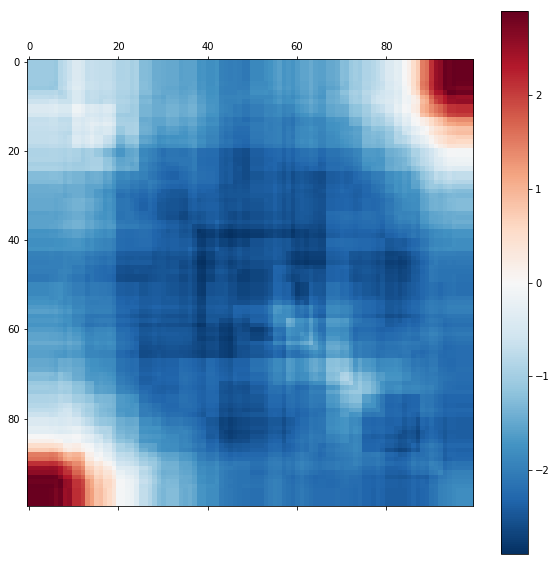

In [7]:
avg1 = plot_resized_average_with_window(container1, 1, loop_new_size)

###### Chromosome 5

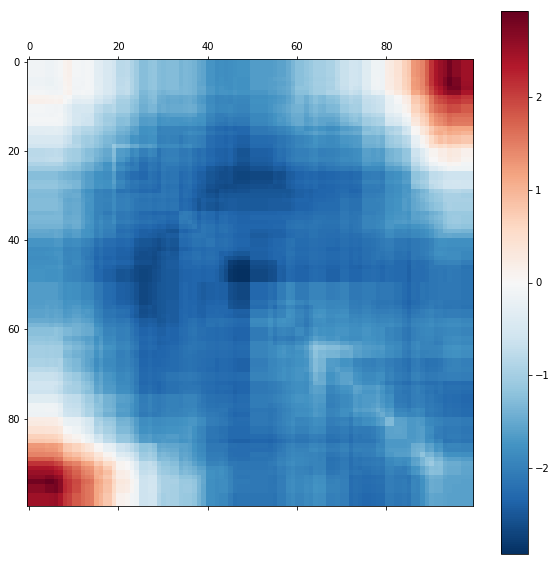

In [8]:
avg5 = plot_resized_average_with_window(container5, 5, loop_new_size)

###### Chromosome 6

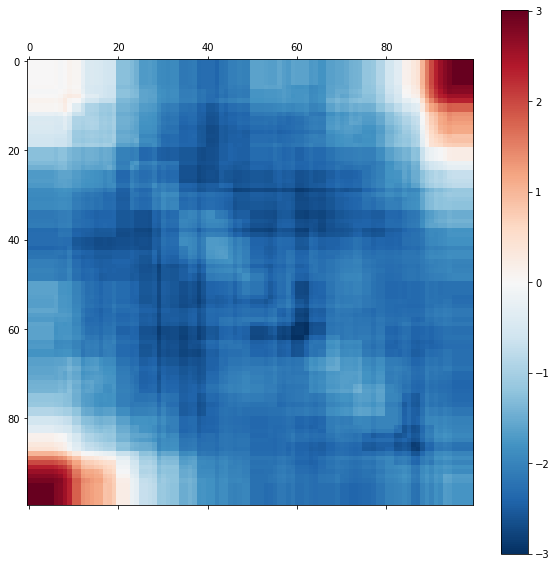

In [9]:
avg6 = plot_resized_average_with_window(container6, 6, loop_new_size)

###### Overall

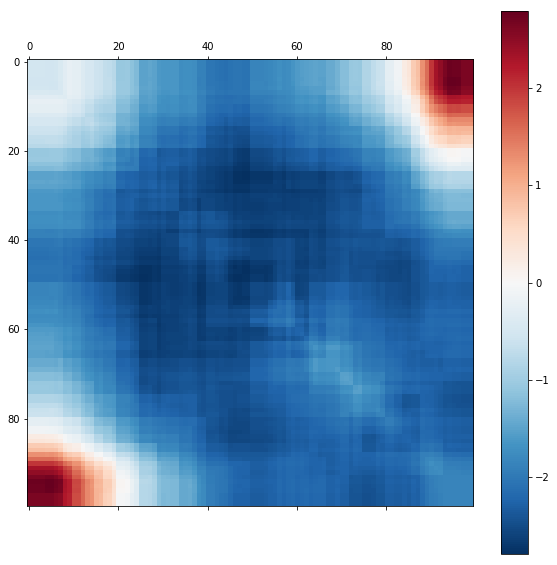

In [10]:
avg = (avg1 * loops_info_chr1.shape[0]  + avg5 * loops_info_chr5.shape[0] + avg6 * loops_info_chr6.shape[0]) / loops_info.shape[0]
loops_utils.plot_HiC(loops_utils.z_norm_zero_middle(avg),
                     figsize=(10, 10),
                     name='average_loops/dicty_resized_average_loop_overall',
                     is_loop_window=False)

##### With window

###### Chromosome 1

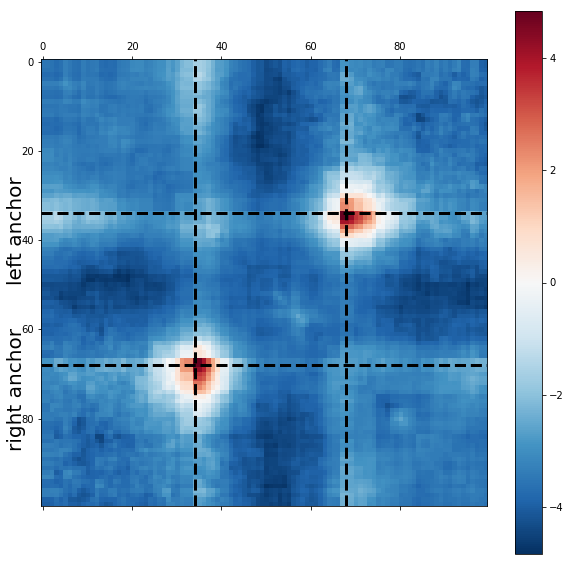

In [11]:
avg_w1 = plot_resized_average_with_window(container1, 1, loop_new_size, True)

###### Chromosome 5

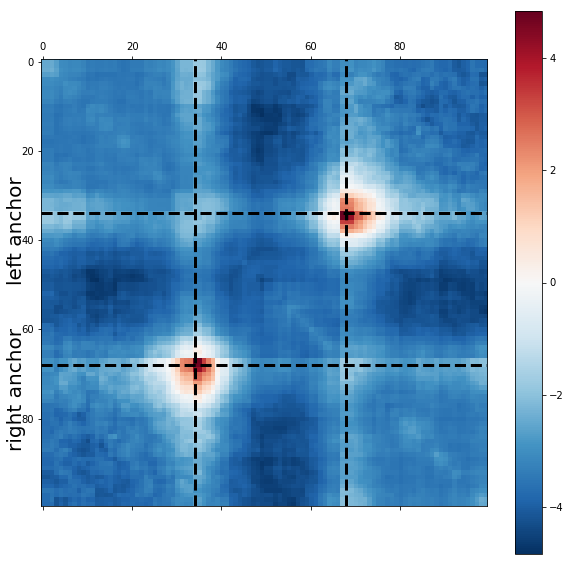

In [12]:
avg_w5 = plot_resized_average_with_window(container5, 5, loop_new_size, True)

###### Chromosome 6

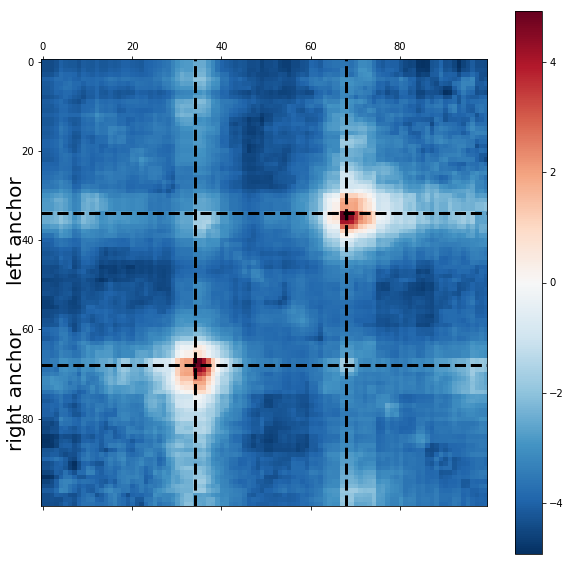

In [13]:
avg_w6 = plot_resized_average_with_window(container6, 6, loop_new_size, True)

###### Overall

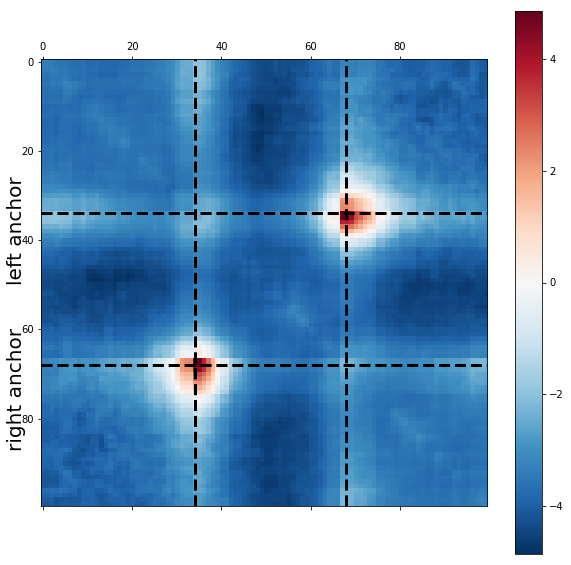

In [14]:
avg = (avg_w1 * loops_info_chr1.shape[0]  + avg_w5 * loops_info_chr5.shape[0] + avg_w6 * loops_info_chr6.shape[0]) / loops_info.shape[0]
loops_utils.plot_HiC(loops_utils.z_norm_zero_middle(avg),
                     figsize=(10, 10),
                     name='average_loops/dicty_resized_with_window_average_loop_overall',
                     is_loop_window=True)